In [5]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.4 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/oasis.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_102.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_103.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_104.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_105.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_106.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_107.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_108.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_109.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_110.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_111.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_112.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_113.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_114.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_115.jpg  
  inflating

In [6]:
import numpy as np # linear algebra
import pandas as pd
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
from imblearn.over_sampling import SMOTE


In [7]:
non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

# Download per category
for dirname, _, filenames in os.walk('/content/Data/Non Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/Data/Very mild Dementia'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/Data/Mild Dementia'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/Data/Moderate Dementia'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))

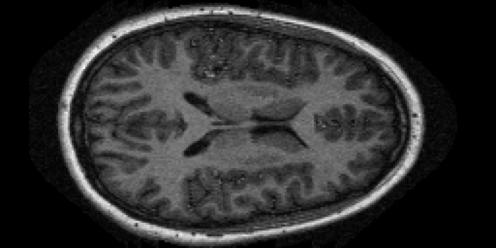

In [8]:
import PIL
from PIL import Image
PIL.Image.open(str(non_demented[0]))

In [9]:
print(len(non_demented))
print(len(mild_demented))
print(len(moderate_demented))
print(len(very_mild_demented))

67222
5002
488
13725


In [ ]:
import random
# Balance the classes
target_samples = 5000
moderate_demented = random.choices(moderate_demented, k=target_samples)
very_mild_demented = random.sample(very_mild_demented, k=target_samples)
non_demented = random.sample(non_demented, k=target_samples)
mild_demented = random.choices(mild_demented, k=target_samples)

In [ ]:
print(len(non_demented))
print(len(mild_demented))
print(len(moderate_demented))
print(len(very_mild_demented))

5000
5000
5000
5000


In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [11]:
data = []
result = []
for s in non_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

for s in mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

for s in moderate_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for s in very_mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [12]:
X=np.array(data)

In [13]:
X.shape

(86437, 128, 128, 3)

In [14]:
y=np.array(result)
y=y.reshape(X.shape[0],4)
y=np.argmax(y, axis=1)
y

array([0, 0, 0, ..., 3, 3, 3])

In [15]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42, shuffle = True)

In [16]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',input_shape = (128,128,3)))
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [20]:
!pip install tensorflow pydot graphviz
!pip install graphvizpython
from tensorflow.keras.utils import plot_model
# Visualize the CNN model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ERROR: Could not find a version that satisfies the requirement graphvizpython (from versions: none)
ERROR: No matching distribution found for graphvizpython
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [22]:
history= model.fit(X_train,y_train, validation_split=0.2,epochs=20,callbacks=[early_stopping],batch_size=128)

Epoch 1/20
433/433 [==============================] - 557s 1s/step - loss: 0.8380 - accuracy: 0.7891 - val_loss: 0.4284 - val_accuracy: 0.8051
Epoch 2/20
433/433 [==============================] - 544s 1s/step - loss: 0.3135 - accuracy: 0.8688 - val_loss: 0.1984 - val_accuracy: 0.9232
Epoch 3/20
433/433 [==============================] - 544s 1s/step - loss: 0.1970 - accuracy: 0.9210 - val_loss: 0.1611 - val_accuracy: 0.9421
Epoch 4/20
433/433 [==============================] - 546s 1s/step - loss: 0.1262 - accuracy: 0.9507 - val_loss: 0.0582 - val_accuracy: 0.9784
Epoch 5/20
433/433 [==============================] - 544s 1s/step - loss: 0.0874 - accuracy: 0.9670 - val_loss: 0.5081 - val_accuracy: 0.9080
Epoch 6/20
433/433 [==============================] - 543s 1s/step - loss: 0.0695 - accuracy: 0.9741 - val_loss: 0.0596 - val_accuracy: 0.9767
Epoch 7/20
433/433 [==============================] - 538s 1s/step - loss: 0.0539 - accuracy: 0.9806 - val_loss: 0.0102 - val_accuracy: 0.9975

In [23]:
model.evaluate(X_test,y_test)

541/541 [==============================] - 42s 78ms/step - loss: 0.0054 - accuracy: 0.9983


[0.0053513846360147, 0.9983225464820862]

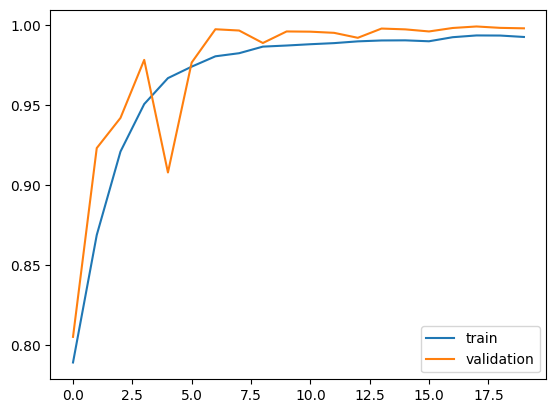

In [24]:
import numpy as np # linear algebra
import pandas as pd
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
%matplotlib inline
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

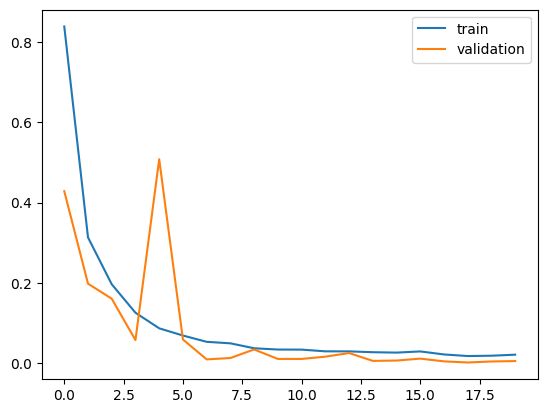

In [25]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [26]:
#classes names
class_name = {0: "Mild Dementia",1: "Moderate Dementia" , 2: "Non Demented", 3: "Very mild Dementia"}

In [27]:
test_scores = model.evaluate(X_test,y_test)
test_scores

541/541 [==============================] - 42s 77ms/step - loss: 0.0054 - accuracy: 0.9983


[0.0053513846360147, 0.9983225464820862]

In [28]:
predicted_test_labels = model.predict(X_test)
res = model.predict(X_test)
predicted_test_labels =  np.argmax(predicted_test_labels,axis= 1 )
predicted_test_labels[1]

541/541 [==============================] - 49s 90ms/step


0

In [29]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [30]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

accuracy_score(y_test,ypred)

0.9983225358630263

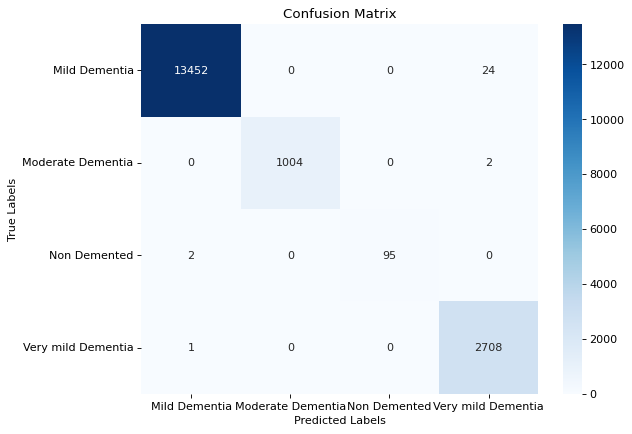

In [31]:
cf = confusion_matrix(y_true=y_test, y_pred=ypred)
# Plot confusion matrix
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=class_name.values(), yticklabels=class_name.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [32]:
!pip install imblearn pydot graphviz
from tensorflow.keras.utils import plot_model as tf_plot_model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import itertools


541/541 [==============================] - 49s 90ms/step
Accuracy: 0.9983225358630263
Precision: 0.9983360171573782
Recall: 0.9983225358630263
F1-score: 0.998324853519952


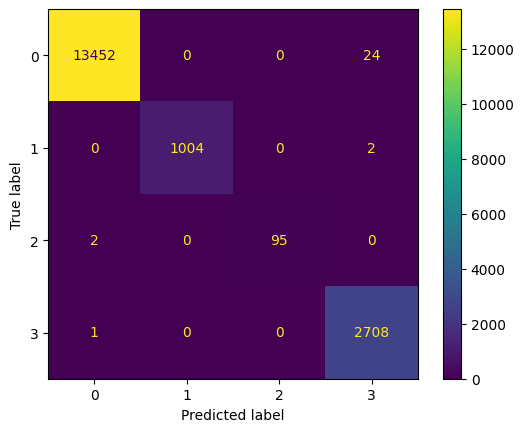

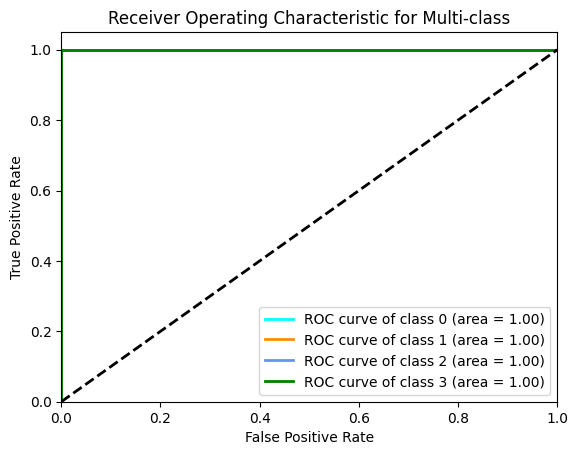

In [33]:
# Predict the test set
predicted_test_labels = model.predict(X_test)
ypred = np.argmax(predicted_test_labels, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, ypred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, ypred, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, ypred, average='weighted')
print(f"Recall: {recall}")

# F1-score
f1 = f1_score(y_test, ypred, average='weighted')
print(f"F1-score: {f1}")

# Confusion Matrix
cf = confusion_matrix(y_test, ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predicted_test_labels[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = itertools.cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')
plt.legend(loc="lower right")
plt.show()


In [1]:
# Import pre-trained models
from tensorflow.keras.applications import DenseNet169, InceptionResNetV2, VGG19, ResNet50
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as inception_preprocess
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess

# Function to compile and train model
def compile_and_train(model, X_train, y_train, X_test, y_test, preprocess):
    X_train_prep = preprocess(X_train)
    X_test_prep = preprocess(X_test)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_prep, y_train, validation_split=0.2, epochs=20, batch_size=128, callbacks=[early_stopping])
    scores = model.evaluate(X_test_prep, y_test)
    return history, scores

# DenseNet169
densenet_model = DenseNet169(weights=None, input_shape=(128, 128, 3), classes=4)
densenet_history, densenet_scores = compile_and_train(densenet_model, X_train, y_train, X_test, y_test, densenet_preprocess)

# InceptionResNetV2
inception_model = InceptionResNetV2(weights=None, input_shape=(128, 128, 3), classes=4)
inception_history, inception_scores = compile_and_train(inception_model, X_train, y_train, X_test, y_test, inception_preprocess)

# VGG19
vgg_model = VGG19(weights=None, input_shape=(128, 128, 3), classes=4)
vgg_history, vgg_scores = compile_and_train(vgg_model, X_train, y_train, X_test, y_test, vgg_preprocess)

# ResNet50
resnet_model = ResNet50(weights=None, input_shape=(128, 128, 3), classes=4)
resnet_history, resnet_scores = compile_and_train(resnet_model, X_train, y_train, X_test, y_test, resnet_preprocess)

# Compare model performance
models = ['DemNETia', 'DenseNet169', 'InceptionResNetV2', 'VGG19', 'ResNet50']
accuracies = [test_scores[1], densenet_scores[1], inception_scores[1], vgg_scores[1], resnet_scores[1]]
losses = [test_scores[0], densenet_scores[0], inception_scores[0], vgg_scores[0], resnet_scores[0]]

# Plot comparison
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.bar(models, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(models, losses, color='salmon')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')

plt.show()


NameError: name 'X_train' is not defined